# Persiapan

In [29]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')

In [32]:
#PANGGIL DATASET YANG DIBUTUHKAN
df = pd.read_csv('UTS_SIB19_063_Ahmad Izza Zain.csv')

In [31]:
#MENAMPILKAN DATASET
df.columns = [column.lower() for column in df.columns]
df

,unnamed: 0,age,employment type,graduateornot,annualincome,familymembers,chronicdiseases,frequentflyer,evertravelledabroad,travelinsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


# Analisa Data
Melakukan Pengecekan dari isi dataset yang digunakan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unnamed: 0           1987 non-null   int64 
 1   age                  1987 non-null   int64 
 2   employment type      1987 non-null   object
 3   graduateornot        1987 non-null   object
 4   annualincome         1987 non-null   int64 
 5   familymembers        1987 non-null   int64 
 6   chronicdiseases      1987 non-null   int64 
 7   frequentflyer        1987 non-null   object
 8   evertravelledabroad  1987 non-null   object
 9   travelinsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [5]:
df.isnull().sum() 

unnamed: 0             0
age                    0
employment type        0
graduateornot          0
annualincome           0
familymembers          0
chronicdiseases        0
frequentflyer          0
evertravelledabroad    0
travelinsurance        0
dtype: int64

In [6]:
for column in df.columns:
  print(f"Kolom {column}: ", np.sort(df[column].unique()))

Kolom unnamed: 0:  [   0    1    2 ... 1984 1985 1986]
Kolom age:  [25 26 27 28 29 30 31 32 33 34 35]
Kolom employment type:  ['Government Sector' 'Private Sector/Self Employed']
Kolom graduateornot:  ['No' 'Yes']
Kolom annualincome:  [ 300000  350000  400000  450000  500000  550000  600000  650000  700000
  750000  800000  850000  900000  950000 1000000 1050000 1100000 1150000
 1200000 1250000 1300000 1350000 1400000 1450000 1500000 1550000 1650000
 1700000 1750000 1800000]
Kolom familymembers:  [2 3 4 5 6 7 8 9]
Kolom chronicdiseases:  [0 1]
Kolom frequentflyer:  ['No' 'Yes']
Kolom evertravelledabroad:  ['No' 'Yes']
Kolom travelinsurance:  [0 1]


# Visualisasi Data

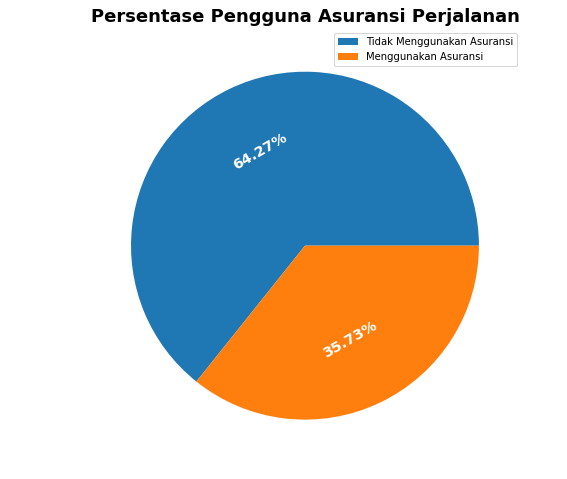

In [7]:
plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(df['travelinsurance']), 
        labels = ['Tidak Menggunakan Asuransi', 'Menggunakan Asuransi'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'})

plt.legend()
plt.title('Persentase Pengguna Asuransi Perjalanan', fontsize = 18, fontweight = 'bold')
plt.show()

# PREPROCESSING 

Melakukan Data Cleaning

In [8]:
df.drop(['unnamed: 0'],axis = 1,inplace = True)
df

,age,employment type,graduateornot,annualincome,familymembers,chronicdiseases,frequentflyer,evertravelledabroad,travelinsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


Data Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['employment type'] = label_encoder.fit_transform(df['employment type'])
df['graduateornot'] = label_encoder.fit_transform(df['graduateornot'])
df['frequentflyer'] = label_encoder.fit_transform(df['frequentflyer'])
df['evertravelledabroad'] = label_encoder.fit_transform(df['evertravelledabroad'])

In [10]:
df

,age,employment type,graduateornot,annualincome,familymembers,chronicdiseases,frequentflyer,evertravelledabroad,travelinsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


In [11]:
#SPLITTING DATA MENJADI X DAN Y
x = df.drop('travelinsurance', axis=1)
y = df['travelinsurance']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

In [13]:
from sklearn.preprocessing import MinMaxScaler
df_scaled = df.copy()
to_scale = ['annualincome','age','familymembers']
scaler = MinMaxScaler()
df_scaled[to_scale] = scaler.fit_transform(df_scaled[to_scale])

In [14]:
df_scaled

,age,employment type,graduateornot,annualincome,familymembers,chronicdiseases,frequentflyer,evertravelledabroad,travelinsurance
0,0.6,0,1,0.066667,0.571429,1,0,0,0
1,0.6,1,1,0.633333,0.714286,0,0,0,0
2,0.9,1,1,0.133333,0.285714,1,0,0,1
3,0.3,1,1,0.266667,0.142857,1,0,0,0
4,0.3,1,1,0.266667,0.857143,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,0.8,1,1,0.800000,0.285714,0,1,1,1
1983,0.3,1,1,0.966667,0.428571,1,0,1,0
1984,0.3,1,1,0.566667,0.571429,1,0,0,0
1985,0.9,1,1,0.466667,0.571429,0,1,1,1


In [15]:
#SPLITTING DATA MENJADI X DAN Y
x_scaled = df_scaled.drop('travelinsurance', axis=1)
y_scaled = df_scaled['travelinsurance']

In [16]:
#MENGECEK PERSEBARAN KELAS
y_scaled.value_counts()

0    1277
1     710
Name: travelinsurance, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=100)
x_scaled, y_scaled = smote.fit_resample(x_scaled, y_scaled)
y_scaled.value_counts()

0    1277
1    1277
Name: travelinsurance, dtype: int64

In [18]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=1) # 70% training and 30% test

# Pencarian Model Terbaik 

In [19]:
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, accuracy_score,confusion_matrix

In [20]:
# Model Validasi Dengan StratifiedKFold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True ,random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
param_dt = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': np.arange(0, 20)}
dt = GridSearchCV(dt, param_grid=param_dt, scoring='accuracy', cv=kfold)
dt.fit(x_scaled, y_scaled)
print("Parameter Terbaik Adalah %s Dengan Nilai Test: %0.0f" % (dt.best_params_, dt.best_score_ * 100 ))

Parameter Terbaik Adalah {'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'} Dengan Nilai Test: 81


In [22]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(**dt.best_params_)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))



Classification report

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       394
           1       0.87      0.69      0.77       373

    accuracy                           0.80       767
   macro avg       0.81      0.80      0.80       767
weighted avg       0.81      0.80      0.80       767


Confusion Matrix

[[357  37]
 [116 257]] 

Accuracy : 0.80
F-Score : 0.80
AUC: 0.80


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_knn = {'n_neighbors': np.arange(2, 100), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn = GridSearchCV(knn, param_grid=param_knn, scoring='accuracy', cv=kfold)
knn.fit(x_scaled, y_scaled)
print("Parameter Terbaik Adalah %s Dengan Nilai Test: %0.0f" % (knn.best_params_, knn.best_score_ * 100 ))

Parameter Terbaik Adalah {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'} Dengan Nilai Test: 75


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(**knn.best_params_)
# Train Decision Tree Classifer
knn = knn.fit(x_train,y_train)
#Predict the response for test dataset
y_pred= knn.predict(x_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))



Classification report

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       394
           1       0.81      0.61      0.70       373

    accuracy                           0.74       767
   macro avg       0.76      0.74      0.74       767
weighted avg       0.76      0.74      0.74       767


Confusion Matrix

[[342  52]
 [146 227]] 

Accuracy : 0.74
F-Score : 0.74
AUC: 0.74


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_rf = {'n_estimators': np.arange(10, 100), 'criterion': ['gini', 'entropy']}
rf = GridSearchCV(rf, param_grid=param_rf, scoring='accuracy', cv=kfold)
rf.fit(x_scaled, y_scaled)
print("Parameter Terbaik Adalah %s Dengan Nilai Test: %0.0f" % (rf.best_params_, rf.best_score_ * 100 ))

Parameter Terbaik Adalah {'criterion': 'entropy', 'n_estimators': 92} Dengan Nilai Test: 81


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier (**rf.best_params_)
rf= rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))


Classification report

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       394
           1       0.81      0.77      0.79       373

    accuracy                           0.80       767
   macro avg       0.80      0.80      0.80       767
weighted avg       0.80      0.80      0.80       767


Confusion Matrix

[[328  66]
 [ 86 287]] 

Accuracy : 0.80
F-Score : 0.80
AUC: 0.80


In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
param_lr =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': np.logspace(0, -15, 100), 'dual': [True, False]}
lr = GridSearchCV(lr, param_grid=param_lr, scoring='accuracy', cv=kfold)
lr.fit(x_scaled, y_scaled)
print("Parameter Terbaik Adalah %s Dengan Nilai Test: %0.0f" % (lr.best_params_, lr.best_score_ * 100 ))

Parameter Terbaik Adalah {'C': 1.0, 'dual': False, 'penalty': 'none'} Dengan Nilai Test: 70


In [28]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression(**lr.best_params_)
rl= rl.fit(x_train, y_train)
y_pred= rf.predict(x_test)
print( '\nClassification report\n' )
print(classification_report(y_test, y_pred))
print( '\nConfusion Matrix\n' )
print(confusion_matrix(y_test, y_pred),'\n')
print('Accuracy :','{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F-Score :','{:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('AUC:','{:.2f}'.format(metrics.auc(fpr, tpr)))


Classification report

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       394
           1       0.81      0.77      0.79       373

    accuracy                           0.80       767
   macro avg       0.80      0.80      0.80       767
weighted avg       0.80      0.80      0.80       767


Confusion Matrix

[[328  66]
 [ 86 287]] 

Accuracy : 0.80
F-Score : 0.80
AUC: 0.80
